In [13]:
import sys

print(sys.version)

3.8.10 (default, May 19 2021, 11:01:55) 
[Clang 10.0.0 ]


# 도트 연산자

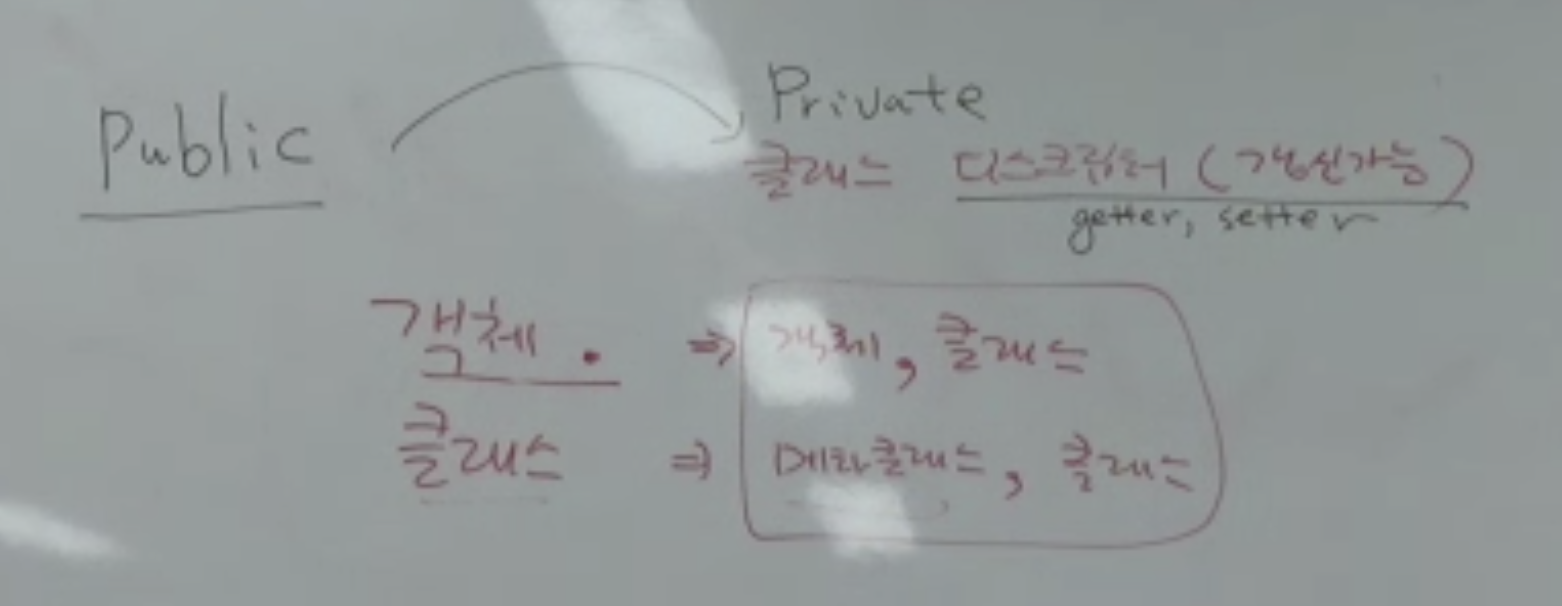

- (클래스 디스크립터 : get, set을 가짐) 클래스의 속성을 먼저 본다. = 갱신 가능한 디스크립터를 가장 먼저 참조한다.
---
- 인터페이스를 제공하는 것만 퍼블릭
- 나머지는 프라이빗 (속성 등)

## 클래스 내부 접근 방식을 알아본다.


## 1. 점 연산자로 접근 

- 클래스나 객체 내부의 네임스페이스를 접근할 때는 점 연산자를 참조한다.


### 객체 속성에 접근할때 발동하는 스페셜 메소드

`__getattribute__` 겟 어트리뷰트

`__getattr__` > 겟어트리

`__setattr__`

`__delattr__`

###  1.1 점 연산자 확인 `__getattribute__`

- 처음 첫번째 점연산 조회할 때 사용  
- 모든 점연산자는 스페셜 메소드이다.

###  클래스에 점 연산로 접근하는 스페셜 메소드를 재정의 

In [55]:
# 모듈의 네임스페이스에 문제가 있을 때, %reset을 하면 주피터 노트북에 있는 네임스페이스를 날려버린다.
# 커널에 돌고 있는 메모리만 지운다.
# 무한루프를 돌린 후 네임스페이스를 초기화 해줘야 에러가 발생하지 않는다.
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


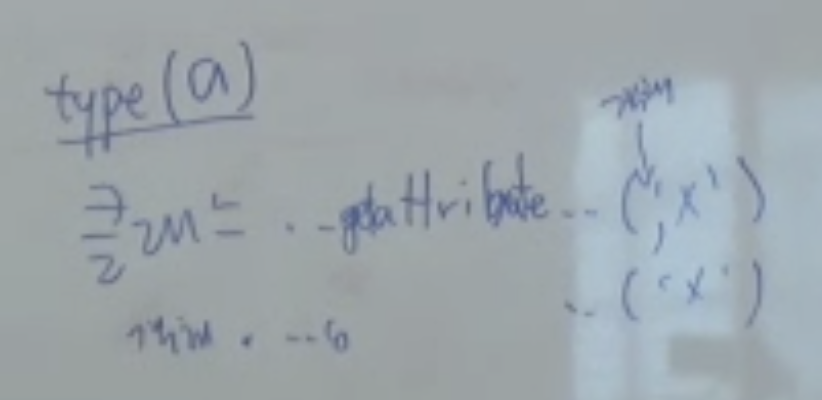

In [172]:
# 클래스 속성에 객체 속성이 없어도 클래스 속성을 사용할 수 있따.
# 클래스 속성이란 : 클래스 내에 있는 함수와 동일한 위치에 있는 속성
# 데이터 디스크립터를 클래스 속성에 넣으면
# 도트연산자가 많아져서 실행구간이 길어지고 복잡해진다.
# 최단거리는 클래스속성으로 접근을 해야 한다.

class A:
    # 객체 속성
    x = 3
    
    def __getattribute__(self, name):
        print("getattribute!!!")
        
        # 상위 클래스 속성을 가져와서 사용한다.
        return super().__getattribute__(name)
    


### 인스턴스를 만들어서 인스턴스에 속성을 추가한다

In [173]:
a = A()

getattribute!!!
getattribute!!!
getattribute!!!
getattribute!!!


### 점연산자 처리방식

- 객체가 만든 클래스 내의 __getattribute__ 함수를 접근해서 객체와 속성 이름으로 접근
- 그러면 객체나 클래스의 속성을 확인한다.

In [174]:
A.__dict__

mappingproxy({'__module__': '__main__',
              'x': 3,
              '__getattribute__': <function __main__.A.__getattribute__(self, name)>,
              '__dict__': <attribute '__dict__' of 'A' objects>,
              '__weakref__': <attribute '__weakref__' of 'A' objects>,
              '__doc__': None})

In [175]:
a.__init__

getattribute!!!


<method-wrapper '__init__' of A object at 0x7fe9d3e28b50>

In [176]:
a.__new__

getattribute!!!


<function object.__new__(*args, **kwargs)>

In [177]:
a.x

getattribute!!!


3

In [178]:
# 클래스를 실행했다가 x를 조회하려했는데
# x라는 객체가 없어서 클래스내에 있는걸 확인하고,
# 클래스에 돌아갔다가 속성이란걸 확인하고 다시 실행하게 되서
# 두번 실행이 된다.
a.__getattribute__('x')

getattribute!!!
getattribute!!!


3

In [179]:
type(a).__getattribute__(a,'x')

getattribute!!!


3

### 객체 속성을 추가하고 조회한다.

In [180]:
a.y = 123

In [ ]:
type(a).__getattribute__(a,'y')

### 인스턴스를 확인하면 클래스의 점 연산자가 실행된다

In [7]:
a.__dict__

getattribute!!!


{'y': 123}

In [8]:
a.y

getattribute!!!


123

### 클래스의 속성을 확인한다

In [9]:
type(a)

__main__.A

In [10]:
A.__dict__

mappingproxy({'__module__': '__main__',
              'x': 3,
              '__getattribute__': <function __main__.A.__getattribute__(self, name)>,
              '__dict__': <attribute '__dict__' of 'A' objects>,
              '__weakref__': <attribute '__weakref__' of 'A' objects>,
              '__doc__': None})

In [11]:
type(a).__dict__

mappingproxy({'__module__': '__main__',
              'x': 3,
              '__getattribute__': <function __main__.A.__getattribute__(self, name)>,
              '__dict__': <attribute '__dict__' of 'A' objects>,
              '__weakref__': <attribute '__weakref__' of 'A' objects>,
              '__doc__': None})

### 상위 클래스를 정의하고 상속을 받아서 하위 속성을 처리 

- 점연산자로 네임스페이스 접근시 없을 경우 경고메시지를 처리하는 방법
- 일단 perm 인자를 추가해서 내부 접근을 막을 수 있다.


In [204]:
import warnings


class Private:
    def __getattribute__(self, name, perm=True):
        if not perm:
            warnings.warn("속성에 접근할 수 없습니다.")
            return None
        return super().__getattribute__(name)


In [205]:
class ScretBox(Private):
    pass

## 인스턴스를 만들고 인스턴스 속성을 추가

In [206]:
# 객체 생성시 getattribute가 네개가 찍히는 이유??

a = ScretBox()

In [207]:
a.x = 3

## 접근할 수 없도록 처리했으므로 warning 처리됨

In [208]:
a.x

3

In [209]:
a.__dict__

{'x': 3}

## 클래스로 접근할 경우에는 워닝이 발생하지 않음 

- 클래스는 메타 클래스의 점연산자를 사용하므로 클래스로 접근할 경우는 경고메시지가 없다.

In [18]:
type(a)

__main__.ScretBox

In [19]:
type(a).__dict__

mappingproxy({'__module__': '__main__', '__doc__': None})

### 인스턴스 속성을 접근할 때 perm에 true 접근하면 워닝이 사라짐 

-  경고메시지 없이 처리하기

In [20]:
type(a).__getattribute__(a, '__dict__', True)

{'x': 3}

### 부분함수를 이용해서 처리하면 퍼미션값부터 넣고 실제 인스턴스와 변수명을 넣으면 처리됨

In [21]:
from functools import partial

perm_a = partial(type(a).__getattribute__, perm=True)
print('partial 이용 : ',perm_a(a, 'x'))

partial 이용 :  3


# 1.2  점연산에서 예외가 발생처리 : `__getattr__`

객체 속성을 찾을때...
**가장 마지막에 실행**

### 클래스 정의할 때 점연산자에 예외 처리부분만 추가

In [272]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [220]:
def __getattribute__(self,name):
    print("getattribute!!!")
    return super().__getattribute__(name)

In [254]:
import warnings

class A:
        
    def __getattribute__(self,name):
        print("getattribute!!!")
        return super().__getattribute__(name)

    def __getattr__(self, name):
        warnings.warn("값이 없습니다. 디폴트값을 넘깁니다.")
        return 3000


### 인스턴스를 만들고 내부 속성 추가 

In [255]:
a = A()

### 있는 속성은 점연산자로 접근이 되므로 출력이 됨 

In [256]:
print('a.var', a.var)


getattribute!!!
a.var 3000


<ipython-input-254-cb11907267a8>:10: UserWarning: 값이 없습니다. 디폴트값을 넘깁니다.
  warnings.warn("값이 없습니다. 디폴트값을 넘깁니다.")


### 없는 속성은 점연산자로 처리가 되지 않으므로 `__getattr__` 메소드를 호출해서 처리

In [257]:
print('a.xxx', a.xxx)

getattribute!!!
a.xxx 3000


<ipython-input-254-cb11907267a8>:10: UserWarning: 값이 없습니다. 디폴트값을 넘깁니다.
  warnings.warn("값이 없습니다. 디폴트값을 넘깁니다.")


## 1.3  점연산자 두개의 메소드 정의  `__getattribute__` vs `__getattr__`

### 클래스에 점 연산자 모든 메소드 정의

In [476]:
def add() :
    locals()[1] = 10
    locals()[2] = 20
    print(locals())
    return locals()[1] + locals()[2]

In [479]:
add()

{1: 10, 2: 20}


30

In [391]:
class A:
    # getattribute 에서 getattr 로 던진다.
    def __getattribute__(self, name):
        print("getattribute")
        return super().__getattribute__(name)
    
    def __getattr__(self, name):
        print("getattr")
        return '없습니다.'
    

### 인스턴스 생성

In [392]:
a = A()

### 없는 속성 접근 

In [393]:
print(a.아무거나씁니다)

getattribute
getattr
없습니다.


### 속성 추가

In [394]:
a.var = 1

### 있는 속성 접근 

In [340]:
print(a.var)

getattribute
1


In [506]:
# class. 으로 불러야한다.
class CCC :
    def __init__(self) :
        self.x = 100
        self.y = 200

In [507]:
c = CCC()

In [519]:
# __getattribute__ call (네임스페이스에 값이 있는지 조회)
getattr(c, 'x')

100

In [520]:
# __setattribute__ call (네임스페이스에 새로운 값을 갱신한다.)
setattr(c, 'z', 300)

In [518]:
# _
hasattr(c, 'x')

True

In [502]:
getattr(c, 'z')

300

In [503]:
delattr(c, 'z')

In [505]:
hasattr(c, 'z')

False

## 1.4 메타 클래스에 점연산자 추가해서  class 속성을 탐색할때

### 메타 클래스 정의 

In [375]:

class Meta(type):
    def __getattribute__(self, name):
        return "classattribute"
    
    
    # 이걸 생성해서 없는 속성에 접근할 때, 여기 값을 리턴해준다.
    def __getattr__(self, name):
        return "classattr"
    


### 클래스에 메타클래스 변경 

In [376]:
class A(metaclass=Meta):
    pass

### 없는 클래스 속성 접근

In [377]:
print(A.없음)

classattribute


In [378]:
a = A()

In [390]:
# 트라이캐치
try :
    print(a.b)
except Exception as e :
    print(e)

'A' object has no attribute 'b'


## 2. 점 연산자로 갱신 `__setattr__`

속성에 객체를 할당할때

## 2.1  점 연산자로 갱신만 하기 

In [606]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [607]:
class A:
    dict__ = {}
    
    def __setattr__(self, name, value):
        # return 필요 없음
        print("setattr!!")
        #A.__dict__[name] = value
        
        self.__dict__[name] = value

In [608]:
a = A()

In [609]:
a.var = 3


setattr!!


In [610]:
print(a.__dict__['var'])

3


## 2.2 모듈에 점연산로 갱신하기  `__setattr__` 적용

### 모듈도 클래스로 인식하므로 실제 모듈을 클래스화해서 처리

In [40]:
%%writefile d7.py

import sys
from types import ModuleType


class MyModule(ModuleType):
    def __repr__(self):
        return 'MyModule'
    
    def __setattr__(self, name, value):
        print(name, "세팅 불가")
        
    @staticmethod
    def func(a, b):
        pass
        
def func(a, b):
    pass
        
sys.modules[__name__].__class__ = MyModule

Overwriting d7.py


### 직전에 만든 모듈에 정보를 세팅하려면 실제 세팅이 안됨

In [41]:
%%writefile d8.py

import d7

print(d7)
d7.a = 3
print(d7.a)

Overwriting d8.py


In [42]:
!python d8.py

MyModule
a 세팅 불가
Traceback (most recent call last):
  File "d8.py", line 6, in <module>
    print(d7.a)
AttributeError: module 'd7' has no attribute 'a'


## 3. 점 연산로 속성 제거 하기 `__delattr__`

In [43]:
class A:
    def __delattr__(self, name):
        print("지울 수 없습니다.")
        


In [44]:
a = A()
a.var = 3

In [45]:
print(a.var)

3


In [46]:
del a.var # 여기서 __delattr__가 작동

print(a.var)

지울 수 없습니다.
3


## 4. 스페셜메소드를 통한 속성 컨트롤

### 인스턴스를 생성할때 반지름을 입력받는 원 객체 / 원의 속성을 가지고 있는..

> 반지름은 mutable    
> 그 외에 지름, 둘레, 넓이는 immutable

In [649]:
%%writefile d10.py


import warnings

MUTABLE = ['radius']
IMMUTABLE = ['diameter', 'circumference', 'area']

class Circle:
    pi = 3.1415
    
    def __init__(self, r):
        self.radius = r
        
    def diameter(self):
        return self.radius * 2
    
    def circumference(self):
        return self.radius * self.pi * 2
    
    def area(self):
        return (self.radius ** 2) * self.pi
    
    # 스페셜 메소드 (도트연산자에 있는 메소드 중 갱신을 조작해서 로직에서 변수를 갱신하지 못하게 만든다.)
    def __setattr__(self, name, value):
        # IMMUTABLE은 변경하지마라고 알림을 뜨게 만드는 것
        if name in IMMUTABLE:
            warnings.warn("불가")
        return super().__setattr__(name, value)
    
    # __delattr__ 추가
    

c = Circle(10)
print(c.radius)
print(c.diameter())
c.radius = 100
c.area = 123

Overwriting d10.py


In [650]:
!python d10.py

10
20
d10.py:27: UserWarning: 불가
  warnings.warn("불가")


In [651]:
class ABC :
    def __init__(self, name):
        self.name = name

In [652]:
a = ABC("aaa")
a.__init__ = 100

In [653]:
ABC.__dict__

mappingproxy({'__module__': '__main__',
              '__init__': <function __main__.ABC.__init__(self, name)>,
              '__dict__': <attribute '__dict__' of 'ABC' objects>,
              '__weakref__': <attribute '__weakref__' of 'ABC' objects>,
              '__doc__': None})

In [654]:
a.__dict__

{'name': 'aaa', '__init__': 100}

In [655]:
a.__init__

100

In [11]:
%%writefile d10.py


import warnings

MUTABLE = ['radius']
IMMUTABLE = ['diameter', 'circumference', 'area']

class Circle:
    pi = 3.1415
    
    def __init__(self, r):
        self.radius = r
        
    def diameter(self):
        return self.radius * 2
    
    def __setattr__(self, name, value):
        if name in ['diameter']:
            warnings.warn("불가")
        return super().__setattr__(name, value)

Overwriting d10.py


In [12]:
c = Circle(10)

NameError: name 'Circle' is not defined

In [13]:
Circle.diameter = 200

NameError: name 'Circle' is not defined

In [ ]:
class Descriptor :
    
    def __init__(self, type_) :
        

In [1]:
class Agreement :
    idno = Descriptor(str)
    owner_name = Descriptor(str)


NameError: name 'Descriptor' is not defined

In [ ]:
der __init__(self, no, name) :
    self.idno = no
    self.owner_name = name

### 클래스를 만드는 메타 클래스

In [6]:
def __init__(self,name,age) :
    self.name = name
    self.age = age

In [ ]:
dd = {"idno" : Descriptor(str),"owner_name" :Descriptor(str)}

In [9]:
A = type("A",(object,),{"__init__" : __init__})

In [10]:
isintance(A, type)

NameError: name 'isintance' is not defined

In [11]:
a = A("솔", 29)

In [12]:
a